## Project Description

**Goal : Build a credit score for each customer**

**Task : Identitfy the relationship between customer's marital status, number of children and loan defaulting**

### Data Description 

children: the number of children in the family

days_employed: how long the customer has been working

dob_years: the customer’s age

education: the customer’s education level

education_id: identifier for the customer’s education

family_status: the customer’s marital status

family_status_id: identifier for the customer’s marital status

gender: the customer’s gender

income_type: the customer’s income type

debt: whether the customer has ever defaulted on a loan

total_income: monthly income

purpose: reason for taking out a loan

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading file 

cscore = pd.read_csv('credit_scoring_eng.csv', na_values = [' '])
cscore.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


In [3]:
cscore.shape

(21525, 12)

In [4]:
#General information

cscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [5]:
#Descriptive statistics 

cscore.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


In [6]:
cscore.describe(include = 'object')

,education,family_status,gender,income_type,purpose
count,21525,21525,21525,21525,21525
unique,15,5,3,8,38
top,secondary education,married,F,employee,wedding ceremony
freq,13750,12380,14236,11119,797


### Data Preprocessing 

In [7]:
#Check for missing values 

cscore.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

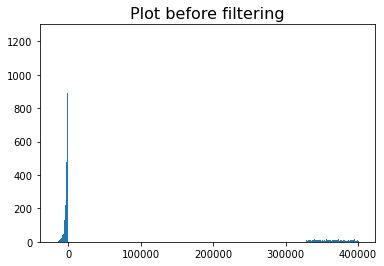

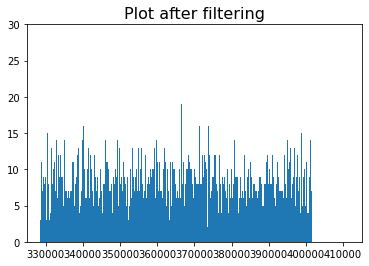

In [8]:
# checking dirtibuting of days_emplyed and total_income 

plt.hist(cscore.days_employed, bins = 'fd')
plt.title('Plot before filtering', fontsize = 16)
plt.show()


plt.hist(cscore.days_employed, bins = 'fd')
plt.title('Plot after filtering', fontsize = 16)
plt.xlim(325000,415000)
plt.ylim(0,30)
plt.show()


#Changin values to positive
cscore.days_employed = cscore.days_employed.abs()

#replacing NAs with 0
cscore.loc[cscore.days_employed.isnull(),'days_employed'] = 0

> - The data column seems to be extremely corrupt and is thus excluded from the analysis. However, the values are turned to absolute values and missing values repplaced with 0 for the purpose of tidiness

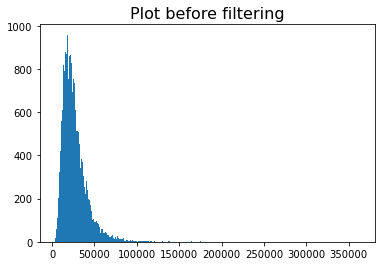

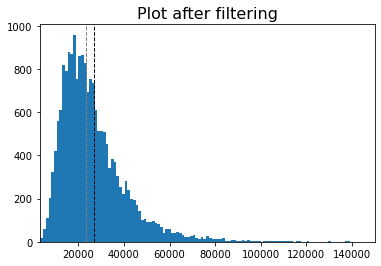

In [9]:
#Checking distribution for ttoal_income 

plt.hist(cscore.total_income, bins = 'fd')
plt.title('Plot before filtering',fontsize = 16)
plt.show()

plt.hist(cscore.total_income, bins = 'fd')
plt.title('Plot after filtering',fontsize = 16)
plt.xlim(3000,150000)
plt.axvline(cscore.total_income.mean(), color='black', linestyle='dashed', linewidth=1)
plt.axvline(cscore.total_income.median(), color='grey', linestyle='dashed', linewidth=1)
plt.show()


> - Since the total_income seems normally distributed, null values in the column can be replaced with the mean value. However, other columns can be used to infer missing values in this column 

In [10]:
# outliers in children 

cscore.children.value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

> - There cannot be -1 children, and having 20 children seems to be an outlier (could have been a typo). So the first one to be replaced with 0 and the second one with 2

In [11]:
# fixing outliers and erros in children col

cscore.children = cscore.children.replace([-1,20],[0,2])
cscore.children.value_counts()

0    14196
1     4818
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

In [12]:
# outliers in dob_years

cscore[(cscore.dob_years <=0) | (cscore.dob_years >100)].dob_years.count()

101

> - There are 101 rows with the value 0. This can be considered as a form of a missing value and an be replaced. 
> - Columns like fmaily_status and children can be used to infer this missing value

In [13]:
#checking for errors in family_status 

cscore.family_status.value_counts()

married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64

In [14]:
# errors in family_id col

cscore.family_status_id.value_counts()

0    12380
1     4177
4     2813
3     1195
2      960
Name: family_status_id, dtype: int64

In [15]:
# replace missing value in dob_years

cscore['mean_age'] = cscore.groupby(['family_status','children']).dob_years.transform('mean')
cscore.head(3)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,mean_age
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,38.255198
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,38.255198
2,0,5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house,47.596892


In [16]:
mask = cscore[(cscore.dob_years <=0) | (cscore.dob_years > 100)] .index.to_list()
  
cscore.loc[mask, 'dob_years'] = cscore.mean_age

In [17]:
cscore.iloc[mask].head(3)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,mean_age
99,0,346541.618895,47.596892,Secondary Education,1,married,0,F,retiree,0,11406.644,car,47.596892
149,0,2664.273168,48.611675,secondary education,1,divorced,3,F,employee,0,11228.230,housing transactions,48.611675
270,3,1872.663186,36.044177,secondary education,1,married,0,F,employee,0,16346.633,housing renovation,36.044177


In [18]:
# errors in education 

cscore.education.value_counts()

secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
GRADUATE DEGREE            1
Graduate Degree            1
Name: education, dtype: int64

> - This shows that there are many duplicates. This can be addressed by lowercasing all the values

In [19]:
# lowercase values in education col

cscore.education = cscore.education.str.lower()

cscore.education.value_counts()

secondary education    15233
bachelor's degree       5260
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64

In [20]:
# error in education_id col 

cscore.education_id.value_counts()

1    15233
0     5260
2      744
3      282
4        6
Name: education_id, dtype: int64

In [21]:
# erros in gender

cscore.gender.value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

> - There is one typo in the gender column. This can be replace with the mode of its own column 

In [22]:
# replacing missing value in gender col

cscore.gender.replace('XNA',cscore.gender.mode()[0], inplace = True)
cscore.gender.value_counts()

F    14237
M     7288
Name: gender, dtype: int64

In [23]:
# errors in income_type 

cscore.income_type.value_counts()

employee                       11119
business                        5085
retiree                         3856
civil servant                   1459
entrepreneur                       2
unemployed                         2
paternity / maternity leave        1
student                            1
Name: income_type, dtype: int64

In [24]:
# errors in purpose column 

cscore.purpose.value_counts()

wedding ceremony                            797
having a wedding                            777
to have a wedding                           774
real estate transactions                    676
buy commercial real estate                  664
buying property for renting out             653
housing transactions                        653
transactions with commercial real estate    651
housing                                     647
purchase of the house                       647
purchase of the house for my family         641
construction of own property                635
property                                    634
transactions with my real estate            630
building a real estate                      626
buy real estate                             624
purchase of my own house                    620
building a property                         620
housing renovation                          612
buy residential real estate                 607
buying my own car                       

> - Although there seems to be a lot of reasons fro taking the loan, it all boils down to only 4 reasons and they are wedding, real estate, car purchase and education.
> - So these must be processed to group them into respective categories

In [25]:
def purpose_cat(val):
    
    if 'wedding' in val.split():
        return 'wedding'
    elif any(x in val.split() for x in ['real estate','property','housing','house']):
        return 'real estate'
    elif 'car' in val.split():
        return 'car purchase'
    elif 'education' in val.split():
        return 'education'

In [26]:
cscore.purpose = cscore.purpose.apply(purpose_cat)

In [27]:
cscore.purpose.value_counts()

real estate     6362
car purchase    3837
education       3114
wedding         2348
Name: purpose, dtype: int64

In [28]:
# Fill missing values in total_income 

cscore['income_fill'] = cscore.groupby(['education','income_type']).total_income.transform('mean')
cscore.iloc[26:30,:]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,mean_age,income_fill
26,0,0.000000,41.0,secondary education,1,married,0,M,civil servant,0,NaN,education,47.596892,24648.816597
27,0,529.191635,28.0,bachelor's degree,0,married,0,M,employee,0,49415.837,real estate,47.596892,30650.288996
28,1,717.274324,26.0,bachelor's degree,0,married,0,F,employee,0,30058.118,real estate,38.255198,30650.288996
29,0,0.000000,63.0,secondary education,1,unmarried,4,F,retiree,0,NaN,None,38.811454,21071.829349


In [29]:
mask = cscore[cscore.total_income.isnull()].index.to_list()

cscore.loc[mask,'total_income'] = cscore.income_fill

cscore.iloc[26:30,:]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,mean_age,income_fill
26,0,0.000000,41.0,secondary education,1,married,0,M,civil servant,0,24648.816597,education,47.596892,24648.816597
27,0,529.191635,28.0,bachelor's degree,0,married,0,M,employee,0,49415.837000,real estate,47.596892,30650.288996
28,1,717.274324,26.0,bachelor's degree,0,married,0,F,employee,0,30058.118000,real estate,38.255198,30650.288996
29,0,0.000000,63.0,secondary education,1,unmarried,4,F,retiree,0,21071.829349,None,38.811454,21071.829349


In [30]:
# categorising age

group_names = ['young_adults','adults','elderly']
cscore['group'] = pd.qcut(cscore.dob_years, [0,0.25,0.75,1], labels = group_names)

cscore.group.value_counts()

adults          10252
young_adults     5977
elderly          5296
Name: group, dtype: int64

In [31]:
# categorising total_income 

group_names = ['very low','low','moderate','high','very high']
cscore['income_group'] = pd.qcut(cscore.total_income, [0,0.20,0.40,0.60,0.70,1], labels = group_names)

cscore.group.value_counts()

adults          10252
young_adults     5977
elderly          5296
Name: group, dtype: int64

In [32]:
# checking for dulicate data

cscore.duplicated().sum()

327

In [33]:
# removing duplicates 
cscore.drop_duplicates(keep = 'first', inplace = True)

cscore.duplicated().sum()

0

In [34]:
# dropping added cols

cscore.drop(['mean_age','income_fill', 'family_status_id', 'education_id', 'days_employed'], axis = 1, inplace = True)

> **Summary of step:**
> - Since the number of children cannot be -1 , it was replaced with 0 and 20 seemed to be an outlier, it was considered as a human error and replaced with 2
> - dob_years and total_income columns has missing values. Since days_employed seemed to be too much corrupt even after taking the absolute values, this column is excluded from further analysis. However, the two columns datatype was changed to integer type initially. Total income’s missing value was replaced with the help of two other columns that is education and income type
> - Column education had some duplicates due to case sensitivity which was fixed by Turing each value to their lowercases
> - Column gender had juts one missing value. So this could easily be replaced with the mode of the column which was Female
> - Lastly, the column purpose had many values but having a closer look at it, it was seen that all the purpose boils down to four main reason. Each value was processed to fit them into one of the 4 categories
> - A new column categorsing the group based on age was added 
> - Some of the redundant columns such as family_status_id and education_id is removed 

> **possible reasons**:
> - Presensce of missing values or wrong values could be due to human error or on purpose to no leak sensitive information
> - Presence of duplicates maybe due to collection of data from different sources which stored the customers information mutiple times 

### EDA

In [35]:
def relation(data,col1,col2='debt'):
    
    
    df = pd.crosstab(index = data[col1], columns = data[col2])
    df['no'] = round((df[0] / (df[0] + df[1]))*100,2)
    df['yes'] = round((df[1] / (df[0] + df[1]))*100,2)
    sns.heatmap(df[['no','yes']], annot=True, fmt = '.3g')
    plt.title('Relation between {} & {}'.format(col1,col2), fontsize=16)
    plt.show()
    
    if col1 == 'income_group':
        sns.displot(data = cscore, x= 'total_income' , hue = 'debt', palette = ['black','blue'])
        plt.xlim(0,100000)
        plt.show()
    
    

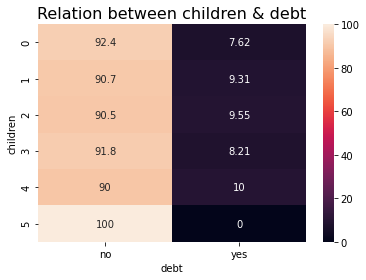

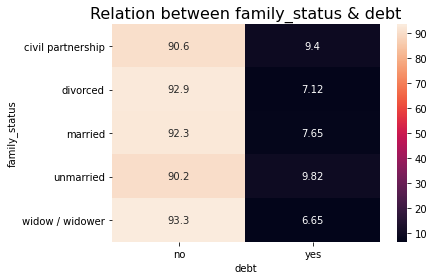

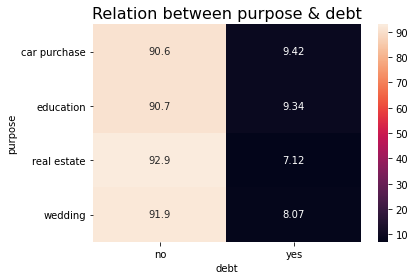

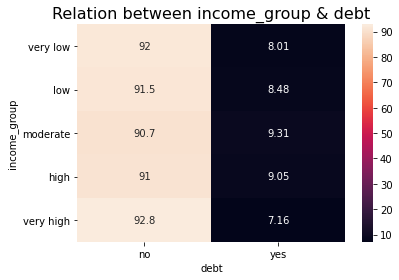

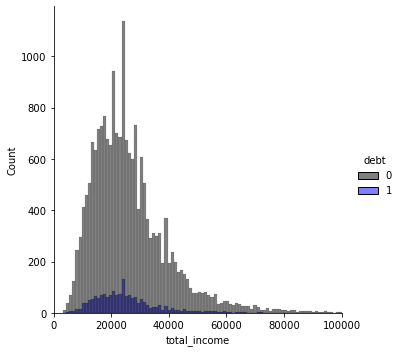

In [36]:
cols = ['children','family_status','purpose','income_group']
const = 'debt'

for i in cols:
    relation(cscore,i,const)

**Relationship between heaving children and defaulting**

- For customer having a particular number of children, the ratio of customers having debt to total customers with particular number of customers is calculated
- Since there is not too much difference in the percentage of defaulted customers having different number of children , it can be shown that there is no direct relationship between having kids and repaying loans
- The customers with 5 children count can be considered as outliers. The percenatge difference could be due to the insadequate number of records

**Relationship between marital status and defaulting**

- {civil-partnership: 9.4% ,divorced: 7.12% , married: 7.65%, unmarried: 9.82%, widow: 6.65%}
- agg() function is used to get the total number of customers for a particular family status and the number of customers who have defaulted.
- Although customers who are unmarried or in a civil citenship have slighlty higher % of default rate, it is not very evident that marital staus is correlated to repaying loan on time.

**Relationship between purpose and defaulting**

- Customers who take loan for buying a car have higher default rate. 
- however since the rate of default is less compared to those who dont default , purpose may also not directly correlates with defaulting alone

**Relationship between total_income and defaulting**

- Again, the ratio of defaulted ones to the total is taken
- Since there is no significant difference between the different income level customer, this correlation can be ruled out

<AxesSubplot:>

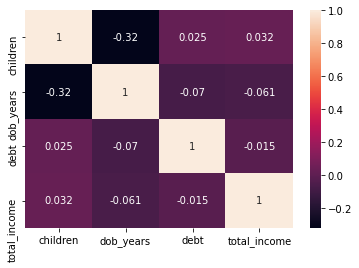

In [37]:
# check correlation matrix 

cm = cscore.corr()
sns.heatmap(cm, annot= True)

### General conclusion:

- The data set had to preprocessed to fill in missing values, remove duplicate records and change the data types
- some of the columns were analysed to check its direct correlation with defaulting. It seemed that none of the columns alone can prove whether or not a customer would default. 
- Combining attributes might reveal more than just considering one 